In [3]:
import numpy as np
import seaborn as sns
from scipy.stats import wishart as wish

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
m = 10
n = 1000
Cov = [[1,.75],[.75,1]]
x = wish.rvs(m-1,scale=Cov)
axis = np.zeros(n)
dim1 = np.zeros(n)
dim2 = np.zeros(n)
dim3 = np.zeros(n)
#Generamos n matrices con distribución Wishart(9,Cov), donde Cov es la matriz de covarianza ((1,.75),(.75,1))
for i in range(n):
    x = wish.rvs(m-1,Cov)
    axis[i] = i
    dim1[i] = x[0,0]#Almacenamos el primer elemento
    dim2[i] = x[0,1]#Almacecnamos el segundo elemento
    dim3[i] = x[1,1]#Almacenamos el último elemento

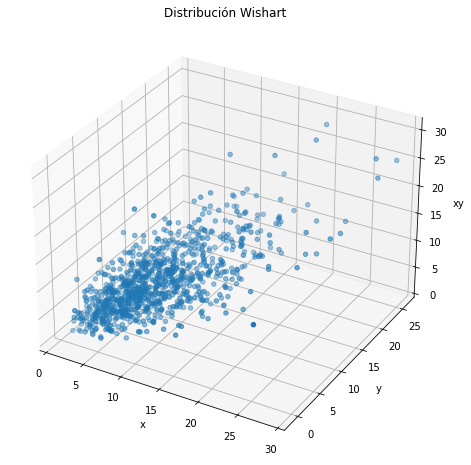

In [9]:
#Graficamos las 3 dimensiones de las matrices generadas
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dim1,dim2,dim3)
plt.title("Distribución Wishart")
plt.xlabel("x")
plt.ylabel("y")
ax.set_zlabel("xy")
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()

In [11]:
#Generamos 40 series de tiempo de tamaño 10 con entradas Gaussianas
p = 40
n=10
Z = np.random.randn(p,n)
Z_scale = scale.fit_transform(Z) #Estandarizamos la matriz de series de tiempo

In [12]:
#Obtenemos la matriz de covarianzas
C = (1/n)*Z_scale.dot(np.transpose(Z_scale))

<AxesSubplot:>

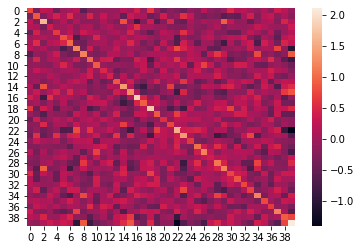

In [14]:
sns.heatmap(C)#Mostramos el mapa de calor de la matriz de covarianzas 

In [16]:
#Calculamos las medias y desviacionnes estándar de los elementos en la diagonal y de los elementos fuera de la diagonal
diag = np.zeros(p)
nodiag = np.zeros(p*p-p)
cont = 0
for i in range(p):
    for j in range(p):
        if(i ==j):
            diag[i] =  C[i,i]#Almaceno los elementos de la diagonal
        else :
            nodiag[cont] = C[i,j]#Almaceno los elementos fuera de la diagonal
            cont = cont+1
#Hacemos los cálculos con las funciones de python
print("media de la diagonal: ",diag.mean())
print("desviación estándar de la diagonal: ",diag.std())
print("media de los elementos fuera de la diagonal: ",nodiag.mean())
print("desviación estándar de los elementos fuera de la diagonal: ",nodiag.std())

media de la diagonal:  1.0000000000000002
desviación estándar de la diagonal:  0.39422282153473204
media de los elementos fuera de la diagonal:  -0.02564102564102564
desviación estándar de los elementos fuera de la diagonal:  0.308187597506331


<AxesSubplot:>

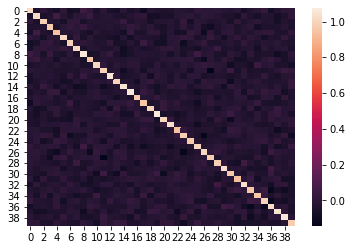

In [21]:
#Generamos 40 series de tiempo de tamaño 1000 con entradas Gaussianas
n=1000
Z = np.random.randn(p,n)
Z_scale = scale.fit_transform(Z) #Estandarizamos la matriz de series de tiempo
C = (1/n)*Z_scale.dot(np.transpose(Z_scale))#Obtenemos la matriz de covarianzas
sns.heatmap(C)#Mostramos el mapa de calor de la matriz de covarianzas 

In [22]:
#Calculamos las medias y desviacionnes estándar de los elementos en la diagonal y de los elementos fuera de la diagonal
diag = np.zeros(p)
nodiag = np.zeros(p*p-p)
cont = 0
for i in range(p):
    for j in range(p):
        if(i ==j):
            diag[i] =  C[i,i]#Almaceno los elementos de la diagonal
        else :
            nodiag[cont] = C[i,j]#Almaceno los elementos fuera de la diagonal
            cont = cont+1
#Hacemos los cálculos con las funciones de python
print("media de la diagonal: ",diag.mean())
print("desviación estándar de la diagonal: ",diag.std())
print("media de los elementos fuera de la diagonal: ",nodiag.mean())
print("desviación estándar de los elementos fuera de la diagonal: ",nodiag.std())

media de la diagonal:  1.0
desviación estándar de la diagonal:  0.038485699933228305
media de los elementos fuera de la diagonal:  -0.02564102564102564
desviación estándar de los elementos fuera de la diagonal:  0.03036025022894377


11
15


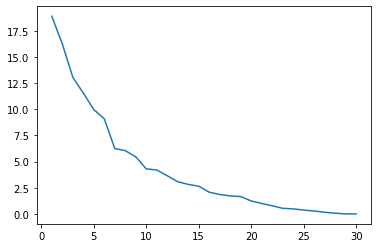

In [23]:
p = 30
n = 30
Z = np.random.randn(p,n)#Generamos una matriz pxn con entradas Gaussianas
D_2 = np.diag(np.concatenate(([12,11,10,9,8,7],3*np.ones(p-6))))#Contruimos la matriz D
X = np.sqrt(D_2).dot(np.transpose(Z))# Generamos X=DZ
S = (1/n)*X.dot(np.transpose(X))#Calculamos la matriz de covarianzas muestrales de X
eigenvalues, eigenvectors = np.linalg.eigh(S)#Obtenemos sus eigenvalores
eigenvalues = np.flip(eigenvalues)#Los ordenamos de mayor a menor
#Construimos la gráfica de codo
x = 1+np.arange(p)
plt.plot(x,eigenvalues)
#Realizamos el criterio del 80% y del 90% de la varianza
total = sum(eigenvalues)#Calculamos la suma de los eigenvalores
#Criterio del 80%
cont = 0
cota = 0
while(cota <total*.8): #Revisa si hemos alcanzado el 80% de la varianza/suma de los eigenvalores
    cota = cota + eigenvalues[cont]
    cont = cont +1
print(cont)
#Criterio del 90%
cont = 0
cota = 0
while(cota <total*.9): #Revisa si hemos alcanzado el 90% de la varianza/suma de los eigenvalores
    cota = cota + eigenvalues[cont]
    cont = cont +1
print(cont)

18
23


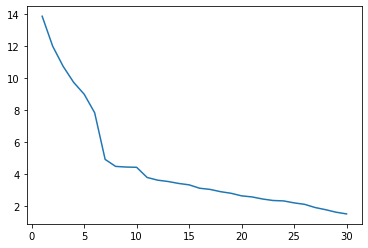

In [24]:
#Realizamos el mismo procedimiento que antes, pero ahora la dimensión n tiene valor 300
p = 30
n = 300
Z = np.random.randn(p,n)
D_2 = np.diag(np.concatenate(([12,11,10,9,8,7],3*np.ones(p-6))))
X = np.sqrt(D_2).dot(Z)
S = (1/n)*X.dot(np.transpose(X))
eigenvalues, eigenvectors = np.linalg.eigh(S)
eigenvalues = np.flip(eigenvalues)
x = 1+np.arange(p)
plt.plot(x,eigenvalues)
total = sum(eigenvalues)
cont = 0
cota = 0
while(cota <total*.8): 
    cota = cota + eigenvalues[cont]
    cont = cont +1
print(cont)
cont = 0
cota = 0
while(cota <total*.9): 
    cota = cota + eigenvalues[cont]
    cont = cont +1
print(cont)

In [2]:
import pandas as pd
import math as mt
import seaborn as sns

In [62]:
p = 30
n = 30
iteraciones = 1000
eigenvalores_totales = []
#Hacemos una simulación de 1000 iteraciones donde generamos una matriz pxn de entradas Gaussianas y calculamos 
#los eigenvalores de su matriz de covarianzas muestrales
for i in range(iteraciones):
    Z = np.random.randn(p,n)
    matriz = (1/n)*Z.dot(np.transpose(Z))
    eigenvalues, eigenvectors = np.linalg.eigh(matriz)
    eigenvalores_totales =  np.concatenate((eigenvalores_totales,eigenvalues))

In [63]:
#Construimos la distribución de Marcenko-Pasteur
x = np.zeros(5000)
y = np.zeros(5000)
cont = 0
for i in np.linspace(delta_min,delta_max,100):
    x[cont] = i
    y[cont] = np.sqrt((delta_max-i)*(i-delta_min))/(2*mt.pi*c*i)
    cont = cont +1

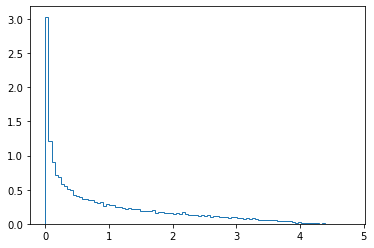

In [66]:
#Graficamos la distribución empírica de los eigenvalores obtenida mediante la simulación
plt.hist(eigenvalores_totales,density=True,bins=100,histtype='step')
plt.show()

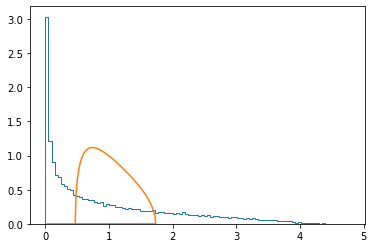

In [64]:
#Superponemos la distribución de Marcenko-Pasteur
plt.hist(eigenvalores_totales,density=True,bins=100,histtype='step')
plt.plot(x,y)

In [67]:
#Realizamos otro experimento para calcular la distribución empírica de los eigenvalores de la matriz de covarianzas
# de un matriz de entradas Gaussianas, ahora la dimensión n=300 en la simulación
p = 30
n = 300
iteraciones = 1000
eigenvalores_totales = []
for i in range(iteraciones):
    Z = np.random.randn(p,n)
    matriz = (1/n)*Z.dot(np.transpose(Z))
    eigenvalues, eigenvectors = np.linalg.eigh(matriz)
    eigenvalores_totales =  np.concatenate((eigenvalores_totales,eigenvalues))

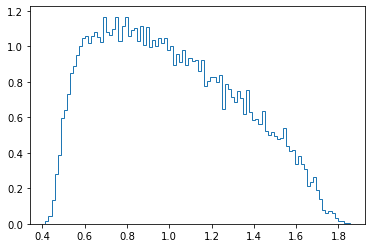

In [68]:
#Graficamos la distribución empírica obtenida
plt.hist(eigenvalores_totales,density=True,bins=100,histtype='step')
plt.show()

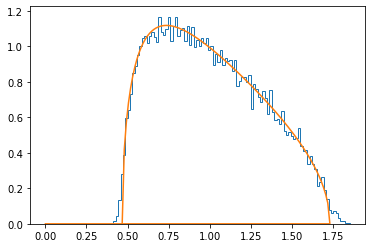

In [69]:
#Superponemos la distribución de Marcenko-Pasteur
plt.hist(eigenvalores_totales,density=True,bins=100,histtype='step')
plt.plot(x,y)

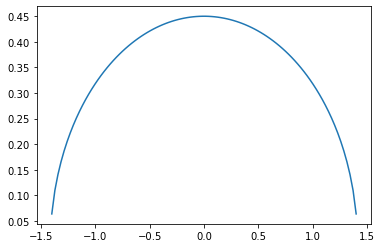

In [5]:
#Construimos la ley del semicírculo de Weigner
x = np.zeros(100)
y = np.zeros(100)
cont = 0
for i in np.linspace(-1.4,1.4,100):
    x[cont] = i
    y[cont] = (1/mt.pi)*np.sqrt(2-i*i)
    cont = cont+1
plt.plot(x,y)

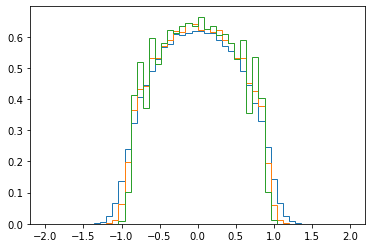

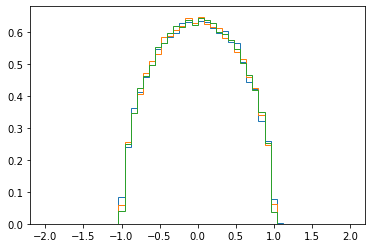

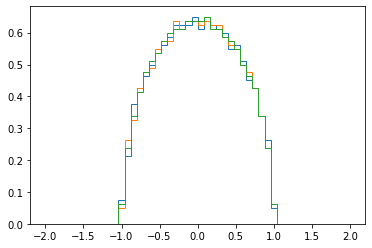

In [43]:
m = 10000
P = [10,100,1000]
for p in P:
    if(p==10):
        m = 10000
    if(p==100):
        m = 100
    if(p==1000):
        m = 1
    #GOE
    eigenvalores_totales = []
    for i in range(m):
        Z = np.random.randn(p,p)
        matriz = (1/np.sqrt(2*p))*(1/2)*(Z+np.transpose(Z))
        eigenvalues, eigenvectors = np.linalg.eigh(matriz)
        eigenvalores_totales =  np.concatenate((eigenvalores_totales,eigenvalues))
    plt.hist(eigenvalores_totales,density=True,bins=50,range=(-2,2),histtype='step')
    #GUE
    eigenvalores_totales = []
    for i in range(m):
        Z = np.matrix(np.zeros(p*p,dtype=complex).reshape((p,p)))
        for i in range(p):
            for j in range(p):
                Z[i,j] = complex(np.random.randn(),np.random.randn())
        Z2 = Z.getH()
        H = (1/np.sqrt(4*p))*(1/2)*(Z+Z2)
        eigenvalues, eigenvectors = np.linalg.eigh(H)
        eigenvalores_totales =  np.concatenate((eigenvalores_totales,eigenvalues))
    plt.hist(eigenvalores_totales,density=True,bins=50,range=(-2,2),histtype='step')
    #GSE
    eigenvalores_totales = []
    for i in range(m):
        X = np.matrix(np.zeros(p*p,dtype=complex).reshape((p,p)))
        Y = np.matrix(np.zeros(p*p,dtype=complex).reshape((p,p)))
        for i in range(p):
            for j in range(p):
                X[i,j] = complex(np.random.randn(),np.random.randn())
                Y[i,j] = complex(np.random.randn(),np.random.randn())
        X_con = np.conjugate(X)
        Y_con = np.conjugate(Y)
        M = np.concatenate((X,Y),axis=1)
        N = np.concatenate((-1*Y_con,X_con),axis=1)
        MN = np.concatenate((M,N),axis=0)
        MN2 = MN.getH()
        H = (1/np.sqrt(8*p))*(1/2)*(MN+MN2)
        eigenvalues, eigenvectors = np.linalg.eigh(H)
        eigenvalores_totales =  np.concatenate((eigenvalores_totales,eigenvalues))
    plt.hist(eigenvalores_totales,density=True,bins=50,range=(-2,2),histtype='step')
    plt.show()

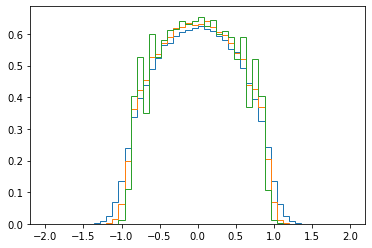

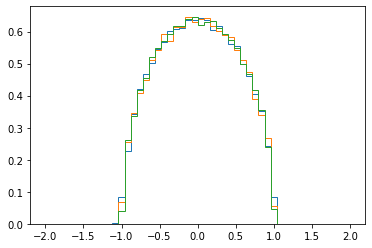

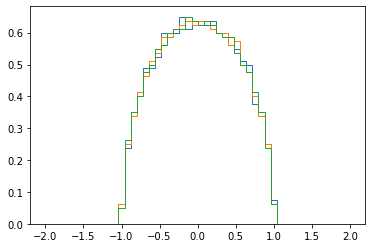

In [44]:
m = 10000
P = [10,100,1000]
for p in P:
    if(p==10):
        m = 10000
    if(p==100):
        m = 100
    if(p==1000):
        m = 1
    #GOE
    eigenvalores_totales = []
    for i in range(m):
        Z = (1/np.sqrt(2*p))*np.random.randn(p,p)
        matriz = (1/2)*(Z+np.transpose(Z))
        eigenvalues, eigenvectors = np.linalg.eigh(matriz)
        eigenvalores_totales =  np.concatenate((eigenvalores_totales,eigenvalues))
    plt.hist(eigenvalores_totales,density=True,bins=50,range=(-2,2),histtype='step')
    #GUE
    eigenvalores_totales = []
    for i in range(m):
        Z = np.matrix(np.zeros(p*p,dtype=complex).reshape((p,p)))
        for i in range(p):
            for j in range(p):
                Z[i,j] = (1/np.sqrt(4*p))*complex(np.random.randn(),np.random.randn())
        Z2 = Z.getH()
        H = (1/2)*(Z+Z2)
        eigenvalues, eigenvectors = np.linalg.eigh(H)
        eigenvalores_totales =  np.concatenate((eigenvalores_totales,eigenvalues))
    plt.hist(eigenvalores_totales,density=True,bins=50,range=(-2,2),histtype='step')
    #GSE
    eigenvalores_totales = []
    for i in range(m):
        X = np.matrix(np.zeros(p*p,dtype=complex).reshape((p,p)))
        Y = np.matrix(np.zeros(p*p,dtype=complex).reshape((p,p)))
        for i in range(p):
            for j in range(p):
                X[i,j] = (1/np.sqrt(8*p))*complex(np.random.randn(),np.random.randn())
                Y[i,j] = (1/np.sqrt(8*p))*complex(np.random.randn(),np.random.randn())
        X_con = np.conjugate(X)
        Y_con = np.conjugate(Y)
        M = np.concatenate((X,Y),axis=1)
        N = np.concatenate((-1*Y_con,X_con),axis=1)
        MN = np.concatenate((M,N),axis=0)
        MN2 = MN.getH()
        H = (1/2)*(MN+MN2)
        eigenvalues, eigenvectors = np.linalg.eigh(H)
        eigenvalores_totales =  np.concatenate((eigenvalores_totales,eigenvalues))
    plt.hist(eigenvalores_totales,density=True,bins=50,range=(-2,2),histtype='step')
    plt.show()

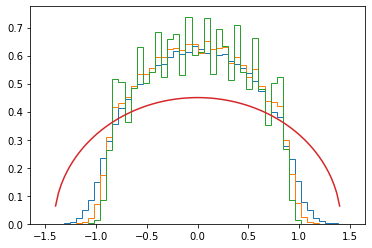

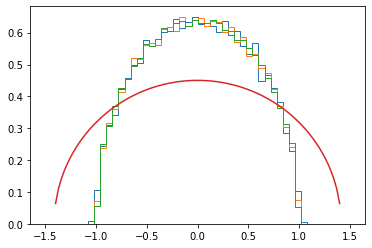

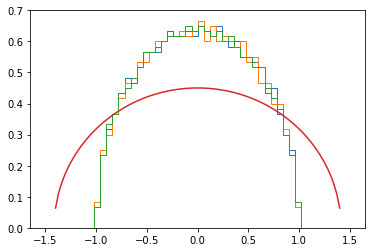

In [5]:
m = 10000
P = [10,100,1000]
for p in P:
    if(p==10):
        m = 10000
    if(p==100):
        m = 100
    if(p==1000):
        m = 1
    #GOE
    eigenvalores_totales = []
    for i in range(m):
        Z = np.random.randn(p,p)
        matriz = (1/2)*(Z+np.transpose(Z))
        eigenvalues, eigenvectors = np.linalg.eigh(matriz)
        eigenvalores_totales =  np.concatenate((eigenvalores_totales,eigenvalues))
    eigenvalores_totales = eigenvalores_totales/np.sqrt(2*p)
    plt.hist(eigenvalores_totales,density=True,bins=50,range=(-1.5,1.5),histtype='step')
    #GUE
    eigenvalores_totales = []
    for i in range(m):
        Z = np.matrix(np.zeros(p*p,dtype=complex).reshape((p,p)))
        for i in range(p):
            for j in range(p):
                Z[i,j] = complex(np.random.randn(),np.random.randn())
        Z2 = Z.getH()
        H = (1/2)*(Z+Z2)
        eigenvalues, eigenvectors = np.linalg.eigh(H)
        eigenvalores_totales =  np.concatenate((eigenvalores_totales,eigenvalues))
    eigenvalores_totales = eigenvalores_totales/np.sqrt(4*p)
    plt.hist(eigenvalores_totales,density=True,bins=50,range=(-1.5,1.5),histtype='step')
    #GSE
    eigenvalores_totales = []
    for i in range(m):
        X = np.matrix(np.zeros(p*p,dtype=complex).reshape((p,p)))
        Y = np.matrix(np.zeros(p*p,dtype=complex).reshape((p,p)))
        for i in range(p):
            for j in range(p):
                X[i,j] = complex(np.random.randn(),np.random.randn())
                Y[i,j] = complex(np.random.randn(),np.random.randn())
        X_con = np.conjugate(X)
        Y_con = np.conjugate(Y)
        M = np.concatenate((X,Y),axis=1)
        N = np.concatenate((-1*Y_con,X_con),axis=1)
        MN = np.concatenate((M,N),axis=0)
        MN2 = MN.getH()
        H = (1/2)*(MN+MN2)
        eigenvalues, eigenvectors = np.linalg.eigh(H)
        eigenvalores_totales =  np.concatenate((eigenvalores_totales,eigenvalues))
    eigenvalores_totales = eigenvalores_totales/np.sqrt(8*p)
    plt.hist(eigenvalores_totales,density=True,bins=50,range=(-1.5,1.5),histtype='step')
    #Construimos la ley del semicírculo de Weigner
    x = np.zeros(100)
    y = np.zeros(100)
    cont = 0
    for i in np.linspace(-1.4,1.4,100):
        x[cont] = i
        y[cont] = (1/mt.pi)*np.sqrt(2-i*i)
        cont = cont+1
    plt.plot(x,y)
    plt.show()

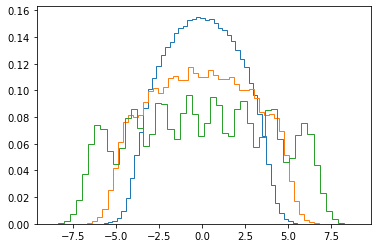

In [48]:
m = 50000
P = [8]
for p in P:
    if(p==10):
        m = 10000
    if(p==100):
        m = 100
    if(p==1000):
        m = 1
    #GOE
    eigenvalores_totales = []
    for i in range(m):
        Z = np.random.randn(p,p)
        matriz = (1/2)*(Z+np.transpose(Z))
        eigenvalues, eigenvectors = np.linalg.eigh(matriz)
        eigenvalores_totales =  np.concatenate((eigenvalores_totales,eigenvalues))
    plt.hist(eigenvalores_totales,density=True,bins=50,histtype='step')
    #GUE
    eigenvalores_totales = []
    for i in range(m):
        Z = np.matrix(np.zeros(p*p,dtype=complex).reshape((p,p)))
        for i in range(p):
            for j in range(p):
                Z[i,j] = complex(np.random.randn(),np.random.randn())
        Z2 = Z.getH()
        H = (1/2)*(Z+Z2)
        eigenvalues, eigenvectors = np.linalg.eigh(H)
        eigenvalores_totales =  np.concatenate((eigenvalores_totales,eigenvalues))
    plt.hist(eigenvalores_totales,density=True,bins=50,histtype='step')
    #GSE
    eigenvalores_totales = []
    for i in range(m):
        X = np.matrix(np.zeros(p*p,dtype=complex).reshape((p,p)))
        Y = np.matrix(np.zeros(p*p,dtype=complex).reshape((p,p)))
        for i in range(p):
            for j in range(p):
                X[i,j] = complex(np.random.randn(),np.random.randn())
                Y[i,j] = complex(np.random.randn(),np.random.randn())
        X_con = np.conjugate(X)
        Y_con = np.conjugate(Y)
        M = np.concatenate((X,Y),axis=1)
        N = np.concatenate((-1*Y_con,X_con),axis=1)
        MN = np.concatenate((M,N),axis=0)
        MN2 = MN.getH()
        H = (1/2)*(MN+MN2)
        eigenvalues, eigenvectors = np.linalg.eigh(H)
        eigenvalores_totales =  np.concatenate((eigenvalores_totales,eigenvalues))
    plt.hist(eigenvalores_totales,density=True,bins=50,histtype='step')
    plt.show()